In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
#jtplot.style()

In [21]:
data = pd.read_csv('train.csv')

In [22]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [24]:
data.SalePrice.value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [25]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [26]:
X = data.drop('SalePrice', axis=1) 
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [27]:
y = data['SalePrice'] 
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Уменьшим размер данных для ускорения обучения, возьмем случайную подвыборку 20% данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [30]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)

In [31]:
#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[cat_feat] = data[cat_feat].fillna('nan')

In [32]:
#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['ID', 'SalePrice'])]

In [33]:
# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = X_train[cat_feat].nunique()
print(cat_nunique)

#Чтобы в разы не увеличивать число признаков при построении dummy,
#будем использовать категориальные признаки с < 30 уникальных значений
cat_feat = list(cat_nunique[cat_nunique < 30].index)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        4
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [34]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(X_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]


# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([X_train[num_feat].fillna(-999),
                     dummy_train], axis=1)

X_test = pd.concat([X_test[num_feat].fillna(-999),
                     dummy_test], axis=1)

In [35]:
def show_auc(y, y_pred, plot_label='', prin=True):    
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

### Случайный лес

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [37]:
#Выберем лучшие парметры для леса
from sklearn.model_selection import train_test_split, GridSearchCV
params = {
    'n_estimators': [5, 10, 20, 40],
    
    'max_depth': [1,  5, 7, 9, 20, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
gs_rf = GridSearchCV(cv=10, param_grid=params, estimator=RandomForestRegressor(), verbose=0)
gs_rf.fit(X_train,y_train)
print(gs_rf.best_params_, gs_rf.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 40} 0.8433115613954495


In [38]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, y_train)   

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
print(gs_rf.best_params_)
print(gs_rf.best_score_)
print(gs_rf.best_estimator_)

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 40}
0.8433115613954495
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [41]:
#Обучим с этим парметрами лес
reg_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
reg_rf.fit(X_train,  y_train) 
print("Правильность на обучающем наборе: {:.3f}".format(reg_rf.score(X_train, y_train)))
#print("Правильность на тестовом наборе: {:.3f}".format(reg_rf.score(X_valid, y_valid)))
final.update({'RandomForestRegressor': reg_rf.score(X_valid, y_valid)})

Правильность на обучающем наборе: 0.959


NameError: name 'final' is not defined

In [42]:
# Важность признаков
imp = pd.Series(clf_rf.feature_importances_)
imp=imp.sort_values(ascending=False)

Text(0, 0.5, 'Признак')

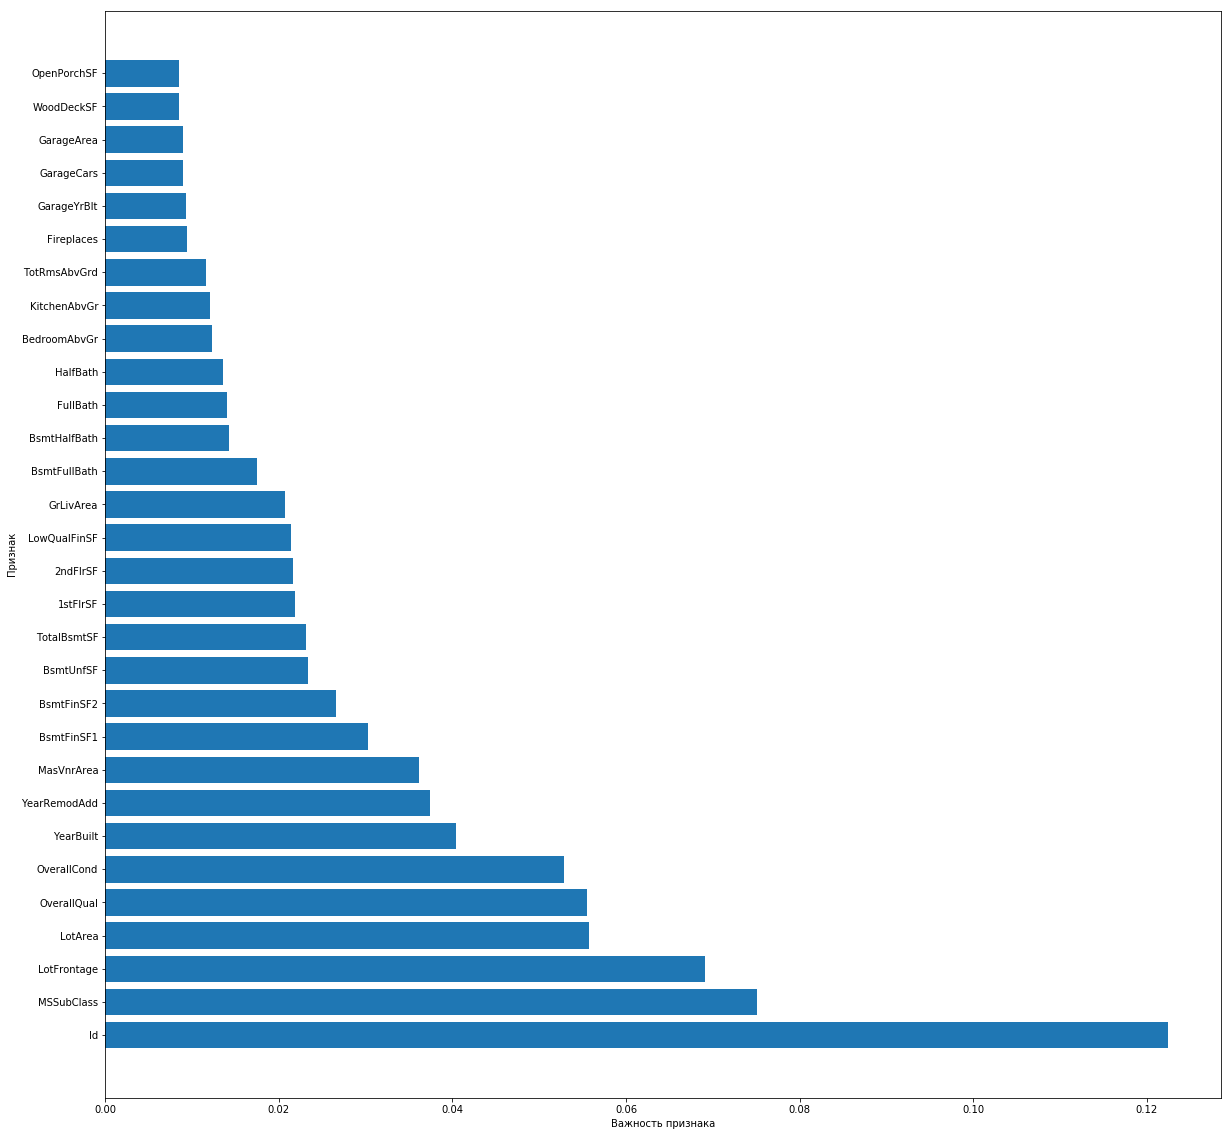

In [43]:
#Выведем 30 самых значиых фичей
plt.rcParams["figure.figsize"] = (20,20)
n_features =len(imp[:30])

plt.barh(range(n_features), imp[:30], align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Важность признака")
plt.ylabel("Признак")

In [44]:
#Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

In [45]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV

params = {
  'alpha': [100,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]
}
gs_rg = GridSearchCV(cv=10, param_grid=params, estimator=Ridge())
gs_rg.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [100, 25, 10, 4, 2, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
print(gs_rg.best_params_)
print(gs_rg.best_score_)
print(gs_rg.best_estimator_)
#print(gs_rg.best_estimator_.score(X_valid, y_valid))

{'alpha': 25}
0.8163926775148752
Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [49]:
final={}
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
#Обучим с этим парметрами ридж регрессию
reg_rg = Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
reg_rg.fit(X_train,  y_train) 
print("Правильность на обучающем наборе: {:.3f}".format(reg_rg.score(X_train, y_train)))
#print("Правильность на тестовом наборе: {:.3f}".format(reg_rg.score(X_valid, y_valid)))
#final.update({'Ridge': reg_rg.score(X_valid, y_valid)})

Правильность на обучающем наборе: 0.885


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
params={'n_estimators':[100,20,10],
            'learning_rate': [0.1, 0.02, 0.01],
            'max_depth':[2,6,4], 
            'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0,0.3,0.1] }
gs_gb = GridSearchCV(cv=10, param_grid=params, estimator=GradientBoostingRegressor())
gs_gb.fit(X_train,y_train)

In [ ]:
#Обучим с этим парметрами GB регрессию
from sklearn.ensemble import GradientBoostingRegressor
reg_gb = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
              subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
reg_gb.fit(X_train,  y_train) 
print("Правильность на обучающем наборе: {:.3f}".format(reg_gb.score(X_train, y_train)))
#print("Правильность на тестовом наборе: {:.3f}".format(reg_gb.score(X_valid, y_valid)))
#final.update({'GradientBoostingRegressor': reg_gb.score(X_valid, y_valid)})

In [ ]:
print(gs_gb.best_params_)
print(gs_gb.best_score_)
print(gs_gb.best_estimator_)
#print(gs_gb.best_estimator_.score(X_valid, y_valid))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
params={
            'max_depth':[None,2,6,4], 
            'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0,0.3,0.1] }
gs_gb = GridSearchCV(cv=10, param_grid=params, estimator=DecisionTreeRegressor())
gs_gb.fit(X_train,y_train)

In [ ]:
#обучим дерево
reg_dt = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
reg_dt.fit(X_train,  y_train) 
print("Правильность на обучающем наборе: {:.3f}".format(reg_dt.score(X_train, y_train)))
#print("Правильность на тестовом наборе: {:.3f}".format(reg_dt.score(X_valid, y_valid)))
#final.update({'DecisionTreeRegressor': reg_dt.score(X_valid, y_valid)})

In [ ]:
def get_meta_features(reg, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_valid, dtype=float)
    
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        reg.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = reg.predict(X_train.iloc[test_ind])
        meta_test += reg.predict(X_test)
        
    return meta_train, meta_test / stack_cv.n_splits

In [ ]:
#Используем 10-fold кросс-валидацию для оценки качества моделей

In [ ]:
from sklearn.model_selection import KFold
meta_train = []
meta_test = []
col_names = []
stack_cv = KFold(n_splits=10, random_state=555)
#stack_cv.get_n_splits(X_train)
print('reg_dt features...')
meta_tr, meta_te = get_meta_features(reg_dt, X_train, y_train, X_valid, stack_cv)
print((meta_tr))

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('reg_dt')

print('reg_rf features...')
meta_tr, meta_te = get_meta_features(reg_rf, X_train, y_train, X_valid, stack_cv)
print((meta_tr))

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('reg_rf')

print('reg_rg features...')
meta_tr, meta_te = get_meta_features(reg_rg, X_train, y_train, X_valid, stack_cv)
print((meta_tr))

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('reg_rg')

print('reg_gb features...')
meta_tr, meta_te = get_meta_features(reg_gb, X_train, y_train, X_valid, stack_cv)
print((meta_tr))
meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('reg_gb')

In [ ]:
col_names

In [ ]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

# Обучим линенйную регрессию на наших метаданных
lr_meta = LinearRegression()
lr_meta.fit(X_meta_train, y_train)

In [ ]:
y_pred_meta_test = lr_meta.predict(X_meta_test)

In [ ]:
#финальная точность
print(clf_lr_meta.score(X_meta_test,y_valid))
final.update({'stack': lr_meta.score(X_meta_test,y_valid)})

In [ ]:
y_pred_meta_test [:10]

In [ ]:
#Самые значимые получилсиь бустинг и ридж
pd.Series(clf_lr_meta.coef_.flatten(), index=X_meta_train.columns).plot(kind='barh')

In [ ]:
# Прогноз стекинга полуисля лучше всех кроме GB
final